                                              0.0/294.9 kB ? eta -:--:--
     -                                        10.2/294.9 kB ? eta -:--:--
     -                                        10.2/294.9 kB ? eta -:--:--
     -----                                 41.0/294.9 kB 326.8 kB/s eta 0:00:01
     -----------                           92.2/294.9 kB 581.0 kB/s eta 0:00:01
     -------------------------------        245.8/294.9 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00
                                              0.0/7.7 MB ? eta -:--:--
                                              0.1/7.7 MB ? eta -:--:--
                                              0.1/7.7 MB 1.1 MB/s eta 0:00:08
     -                                        0.2/7.7 MB 1.8 MB/s eta 0:00:05
     --                                       0.4/7.7 MB 2.6 MB/s eta 0:00:03
     ---                                      0.7/7.7 MB 3.4 MB/s eta 0:00:03
     


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\91993\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [143]:
import numpy as np
import pandas as pd
import seaborn as sns 

import matplotlib.pyplot as plt

%matplotlib inline

In [131]:
import os
for dirname, _, filenames in os.walk('./Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Data/gender_submission.csv
./Data/test.csv
./Data/train.csv


In [132]:
DATA_DIR = './Data/'
TRAIN_DATA = 'train.csv'
TEST_DATA = 'test.csv'

In [185]:
train_data = pd.read_csv(DATA_DIR + TRAIN_DATA)
test_data = pd.read_csv(DATA_DIR + TEST_DATA)
test_ids = test_data["PassengerId"]
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
print (train_data.columns)
print (test_data.columns)
print (len(test_data.columns))

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
11


In [187]:
survivors = train_data.Survived.sum()
unsurvivors = len(train_data) - survivors

print( survivors, 'people survived.')
print( unsurvivors, 'people did not survive.')

342 people survived.
549 people did not survive.


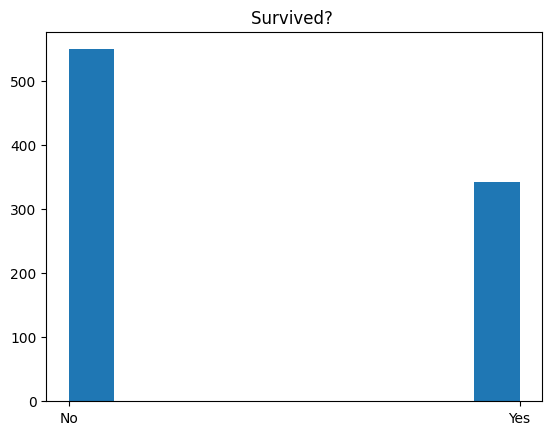

In [188]:
plt.hist(train_data.Survived)
plt.title('Survived? ')
plt.xticks(np.arange(2), ('No', 'Yes'))
plt.show()

In [189]:
train_data.Cabin.isnull().sum() / len(train_data)

0.7710437710437711

<Axes: xlabel='Age', ylabel='Count'>

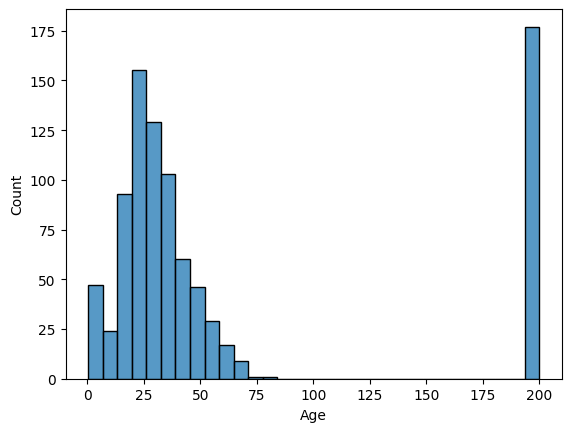

In [190]:
sns.histplot(train_data.Age.fillna(200))

#### Categorical Analysis of Data

In [191]:
train_data[['Pclass', 'Survived']].groupby('Pclass').mean().sort_values(by='Survived', ascending=False)

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [192]:
train_data[['Sex', 'Survived']].groupby('Sex').mean().sort_values(by='Survived', ascending=False)

,Survived
Sex,
female,0.742038
male,0.188908


In [193]:
train_data[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by='Survived', ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<Axes: xlabel='Age', ylabel='Count'>

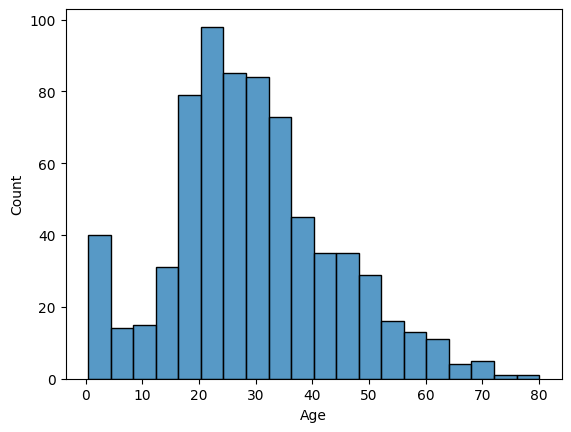

In [194]:
sns.histplot(train_data.Age.dropna())

<Axes: xlabel='Fare', ylabel='Count'>

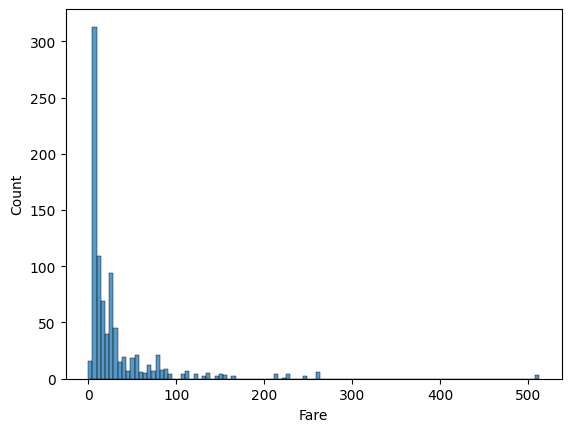

In [195]:
sns.histplot(train_data.Fare.dropna())

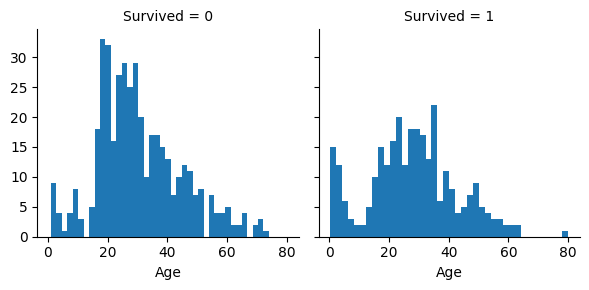

In [196]:
num = sns.FacetGrid(train_data, col='Survived')
print(num.map(plt.hist, 'Age', bins=40))

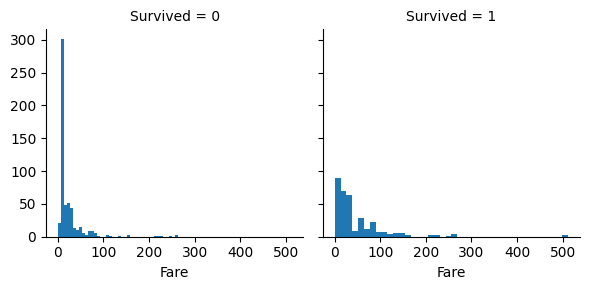

In [197]:
num = sns.FacetGrid(train_data, col='Survived')
print(num.map(plt.hist, 'Fare', bins=40))

#### Feature Cleaning

In [198]:
def clean(data):
    data.drop(["Ticket", "PassengerId"], axis=1, inplace=True)
    cols = ["SibSp", "Parch", "Fare"]
    data.Cabin.fillna("NA", inplace=True)
    data.Cabin = data.Cabin.apply(lambda x : x[0])
    for col in cols:
        fillin_data = data.sort_values('Cabin').groupby('Cabin')[col].median()
        temp_med = data[col].median()
        data[col] = np.where(data[col].isnull(), data.Cabin.apply(lambda x: fillin_data[x] if fillin_data[x] > temp_med else temp_med), data[col])
        data[col].fillna(fillin_data['A'], inplace=True)

    data.Embarked.fillna("U", inplace=True)

    data['Title'] = data.apply(lambda x: x.Name.split(',')[1].split('.')[0][1:], axis = 1)
    data.drop(["Name"], axis=1, inplace=True)

    title_map = {'Mlle':'Miss','Ms':'Miss','Mlle':'Miss', 
             'Mme':'Mrs', 
             'Dr':'Other','Rev':'Other', 'Major':'Other', 'Col':'Other', 'Sir':'Other', 'Dona':'Other',
             'Capt':'Other', 'Lady':'Other','Jonkheer':'Other', 'Don':'Other', 'the Countess':'Other',
            'Mr':'Mr',
            'Miss':'Miss',
            'Mrs':'Mrs',
            'Master':'Master'}
    data['Title'] = data['Title'].map(title_map)

    cat = ["Sex", "Pclass", "Title"]

    data_age = data[cat + ["Age"]]
    data_mean = round(data_age.dropna().groupby(cat, as_index=True).median(), 1)

    def get_age(var, sex, pclass, title):
        if np.isnan(var):
            mean = data_mean['Age'][sex][pclass][title]
        else:
            mean = var
        return mean
    
    data['Age'] = data.apply(lambda x: get_age(x.Age, x.Sex, x.Pclass, x.Title), axis=1)
    return data

train_data = clean(train_data)
test_data = clean(test_data)

C:\Users\91993\AppData\Local\Temp\ipykernel_27152\237132361.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Cabin.fillna("NA", inplace=True)
C:\Users\91993\AppData\Local\Temp\ipykernel_27152\237132361.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when d

In [199]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title
0,0,3,male,22.0,1.0,0.0,7.2500,N,S,Mr
1,1,1,female,38.0,1.0,0.0,71.2833,C,C,Mrs
2,1,3,female,26.0,0.0,0.0,7.9250,N,S,Miss
3,1,1,female,35.0,1.0,0.0,53.1000,C,S,Mrs
4,0,3,male,35.0,0.0,0.0,8.0500,N,S,Mr


In [200]:
train_data.groupby('Title').count().sort_values(by='Survived', ascending=False)['Pclass']

Title
Mr        517
Miss      185
Mrs       126
Master     40
Other      23
Name: Pclass, dtype: int64

In [201]:
test_data.groupby('Title').count().sort_values(by='Pclass', ascending=False)['Pclass']

Title
Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: Pclass, dtype: int64

In [202]:
train_data[['Title', 'Survived']].groupby('Title').mean().sort_values(by='Survived', ascending=False)

,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Other,0.347826
Mr,0.156673


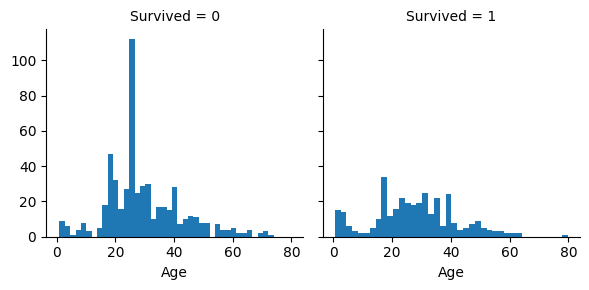

In [204]:
num = sns.FacetGrid(train_data, col='Survived')
print(num.map(plt.hist, 'Age', bins=40))

Lambda: 0.770098


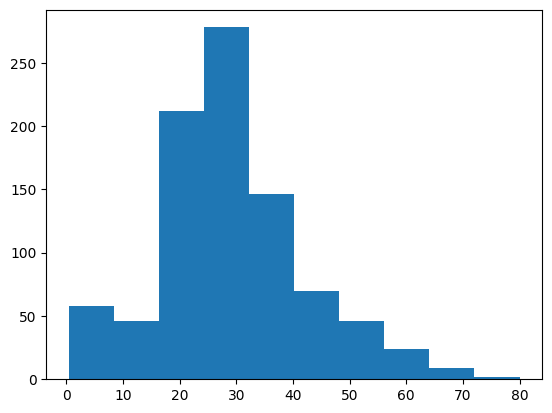

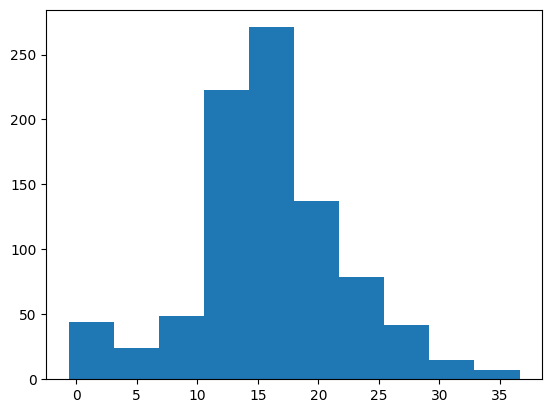

In [206]:
from scipy.stats import boxcox
from matplotlib import pyplot
train_data['Age2'], lam_age = boxcox(train_data['Age'])
print('Lambda: %f' % lam_age)

# histogram
pyplot.hist(train_data['Age'])
pyplot.show()

pyplot.hist(train_data['Age2'])
pyplot.show()

In [208]:
train_data.drop(['Age2'], inplace=True, axis=1)
def get_transform(var):
    return (var**lam_age - 1) / lam_age

train_data['Age'] = train_data.apply(lambda x: get_transform(x.Age),axis=1)
test_data['Age'] = test_data.apply(lambda x: get_transform(x.Age),axis=1)

<Axes: xlabel='Age', ylabel='Count'>

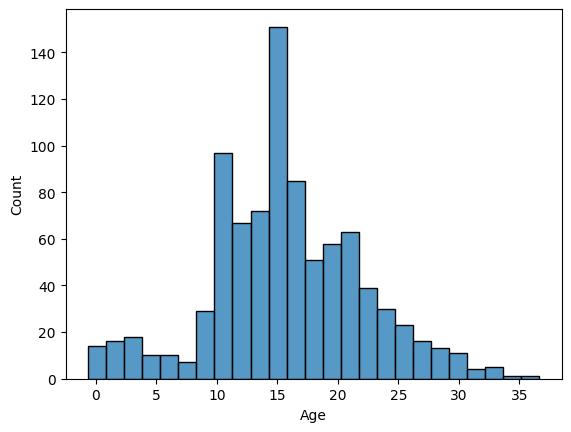

In [209]:
sns.histplot(train_data['Age'])

In [210]:
def get_family_size(Parch, SibSp):
    """
    Return the size of the family 
    
    +1 comes from we need to add the person to the size of the family.
    
    """
    return Parch + SibSp + 1

In [211]:
train_data['FamilySize'] = train_data.apply(lambda x : get_family_size(x.Parch, x.SibSp), axis = 1)
test_data['FamilySize'] = test_data.apply(lambda x : get_family_size(x.Parch, x.SibSp), axis = 1)

In [212]:
train_data[["FamilySize", "Survived"]].groupby(['FamilySize']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilySize,
4.0,0.724138
3.0,0.578431
2.0,0.552795
7.0,0.333333
1.0,0.303538
5.0,0.200000
6.0,0.136364
8.0,0.000000
11.0,0.000000


In [214]:
def get_family_type(var):
    """
    take the size (integer) of the family and return a category (3 labels)
    
    """
    if var == 1:
        return 'alone'
    elif var<=4:
        return 'small'
    else:
        return 'big'

In [215]:
train_data["FamilyType"] = train_data.apply(lambda x : get_family_type(x.FamilySize), axis=1)
test_data["FamilyType"] = test_data.apply(lambda x : get_family_type(x.FamilySize), axis=1)

In [216]:
train_data[["FamilyType", "Survived"]].groupby(['FamilyType']).mean().sort_values(by='Survived', ascending=False)

,Survived
FamilyType,
small,0.578767
alone,0.303538
big,0.161290


In [217]:
train_data.drop(['FamilySize', 'Parch', 'SibSp'], axis = 1, inplace=True)
test_data.drop(['FamilySize', 'Parch', 'SibSp'], axis = 1, inplace=True)

In [234]:
train_data.head(5)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilyType
0,0,3,1,12.737725,7.2500,7,2,2,2
1,1,1,0,20.083187,71.2833,2,0,3,2
2,1,3,0,14.664761,7.9250,7,2,1,0
3,1,1,0,18.771040,53.1000,2,2,3,2
4,0,3,1,18.771040,8.0500,7,2,2,0


In [218]:
from sklearn import preprocessing

In [220]:
le = preprocessing.LabelEncoder()
cols = ["Sex", "Embarked", "Cabin", "Title", "FamilyType"]

for col in cols:
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.fit_transform(test_data[col])
    print (le.classes_)

train_data.head() 

[0 1]
[0 1 2]
[0 1 2 3 4 5 6 7]
['Master' 'Miss' 'Mr' 'Mrs' 'Other']
['alone' 'big' 'small']


,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilyType
0,0,3,1,12.737725,7.2500,7,2,2,2
1,1,1,0,20.083187,71.2833,2,0,3,2
2,1,3,0,14.664761,7.9250,7,2,1,0
3,1,1,0,18.771040,53.1000,2,2,3,2
4,0,3,1,18.771040,8.0500,7,2,2,0


In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

y = train_data["Survived"]
x = train_data.drop(["Survived"], axis=1)

X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [229]:
clf = GradientBoostingClassifier(random_state=0).fit(X_train, y_train) 

In [230]:
predictions = clf.predict(X_val)
from sklearn.metrics import accuracy_score
accuracy_score(y_val, predictions)

0.8379888268156425

In [231]:
submission_predictions = clf.predict(test_data)

In [232]:
df = pd.DataFrame({
    "PassengerId": test_ids,
    "Survived": submission_predictions
})

In [233]:
df.to_csv('submission.csv', index=False)